Running Dijkstra for |V| = 128
Decrease-key operations: 528, Theoretical: 131072
Running Dijkstra for |V| = 256
Decrease-key operations: 1265, Theoretical: 589824
Running Dijkstra for |V| = 512
Decrease-key operations: 3017, Theoretical: 2621440
Running Dijkstra for |V| = 1024
Decrease-key operations: 6556, Theoretical: 11534336

Results:
|V|=128 -> decrease-key: 528, worst-case bound: 131072
|V|=256 -> decrease-key: 1265, worst-case bound: 589824
|V|=512 -> decrease-key: 3017, worst-case bound: 2621440
|V|=1024 -> decrease-key: 6556, worst-case bound: 11534336


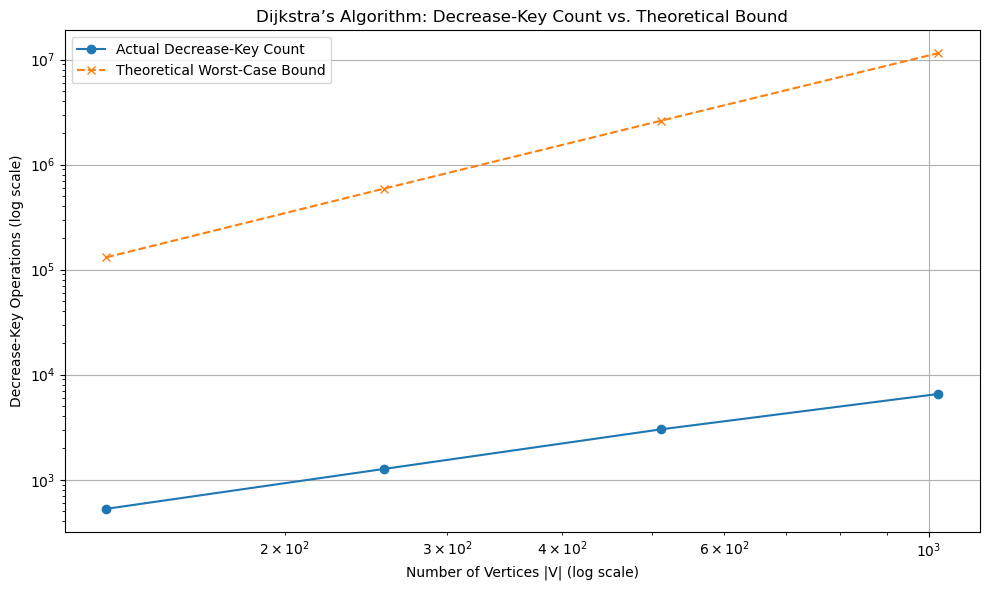

In [1]:
import heapq
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# Dijkstra's algorithm with decrease-key count
def dijkstra_with_decrease_key_count(graph, source):
    n = len(graph)
    dist = [float('inf')] * n
    visited = [False] * n
    dist[source] = 0

    decrease_key_count = 0
    heap = [(0, source)]  # (distance, node)

    while heap:
        d, u = heapq.heappop(heap)
        if visited[u]:
            continue
        visited[u] = True

        for v, weight in graph[u]:
            if not visited[v] and dist[v] > d + weight:
                dist[v] = d + weight
                heapq.heappush(heap, (dist[v], v))
                decrease_key_count += 1  # each time we push a better distance = decrease-key

    return decrease_key_count

# Create a complete directed graph with random weights
def generate_complete_graph(n):
    graph = defaultdict(list)
    for u in range(n):
        for v in range(n):
            if u != v:
                weight = random.uniform(0, 1)
                graph[u].append((v, weight))
    return graph

# Main experiment
sizes = [128, 256, 512, 1024]
actual_counts = []
theoretical_bounds = []

for size in sizes:
    print(f"Running Dijkstra for |V| = {size}")
    g = generate_complete_graph(size)
    count = dijkstra_with_decrease_key_count(g, 0)
    actual_counts.append(count)
    # worst case: |E| * log(|V|) ~ |V|^2 * log(|V|)
    theoretical = size * size * (size.bit_length())
    theoretical_bounds.append(theoretical)
    print(f"Decrease-key operations: {count}, Theoretical: {theoretical}")

# Print raw results
print("\nResults:")
for v, a, t in zip(sizes, actual_counts, theoretical_bounds):
    print(f"|V|={v} -> decrease-key: {a}, worst-case bound: {t}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sizes, actual_counts, 'o-', label='Actual Decrease-Key Count')
plt.plot(sizes, theoretical_bounds, 'x--', label='Theoretical Worst-Case Bound')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Vertices |V| (log scale)')
plt.ylabel('Decrease-Key Operations (log scale)')
plt.title("Dijkstra’s Algorithm: Decrease-Key Count vs. Theoretical Bound")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
